In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.utils import to_categorical

In [108]:
import data_process as dp

In [109]:
df = pd.read_csv('train.csv')

## Using my module

In [110]:
df = dp.process_data(df) # I DID IT!!!!!!!

In [111]:
df.head() #Used module to scale, encode, and log transform datset. Looks a bit different than I expected....

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status_C,Status_CL,Status_D
0,-0.774462,0.494516,0.528226,0.129546,-0.558999,1.051339,0.380140,0.848566,-0.992156,0.982785,...,1,0,1,0,1,0,0,0,0,1
1,0.435506,0.097326,-0.116966,0.441998,-0.095171,0.000000,0.247716,0.364876,-0.331316,0.765936,...,1,0,1,0,1,0,0,1,0,0
2,0.801905,-1.091959,0.837567,0.007399,-0.071300,0.765364,-0.172099,0.159875,-1.447189,-0.708844,...,0,1,0,1,0,0,1,0,0,1
3,0.436499,-0.047971,-0.317804,-0.335437,-0.191185,-0.086003,0.420078,-0.702419,-0.158819,0.037099,...,1,0,1,0,1,0,0,1,0,0
4,-1.077628,-0.409955,0.000000,0.329927,0.164567,0.000000,0.000000,0.244878,-0.158819,0.290685,...,0,1,1,0,1,0,0,1,0,0


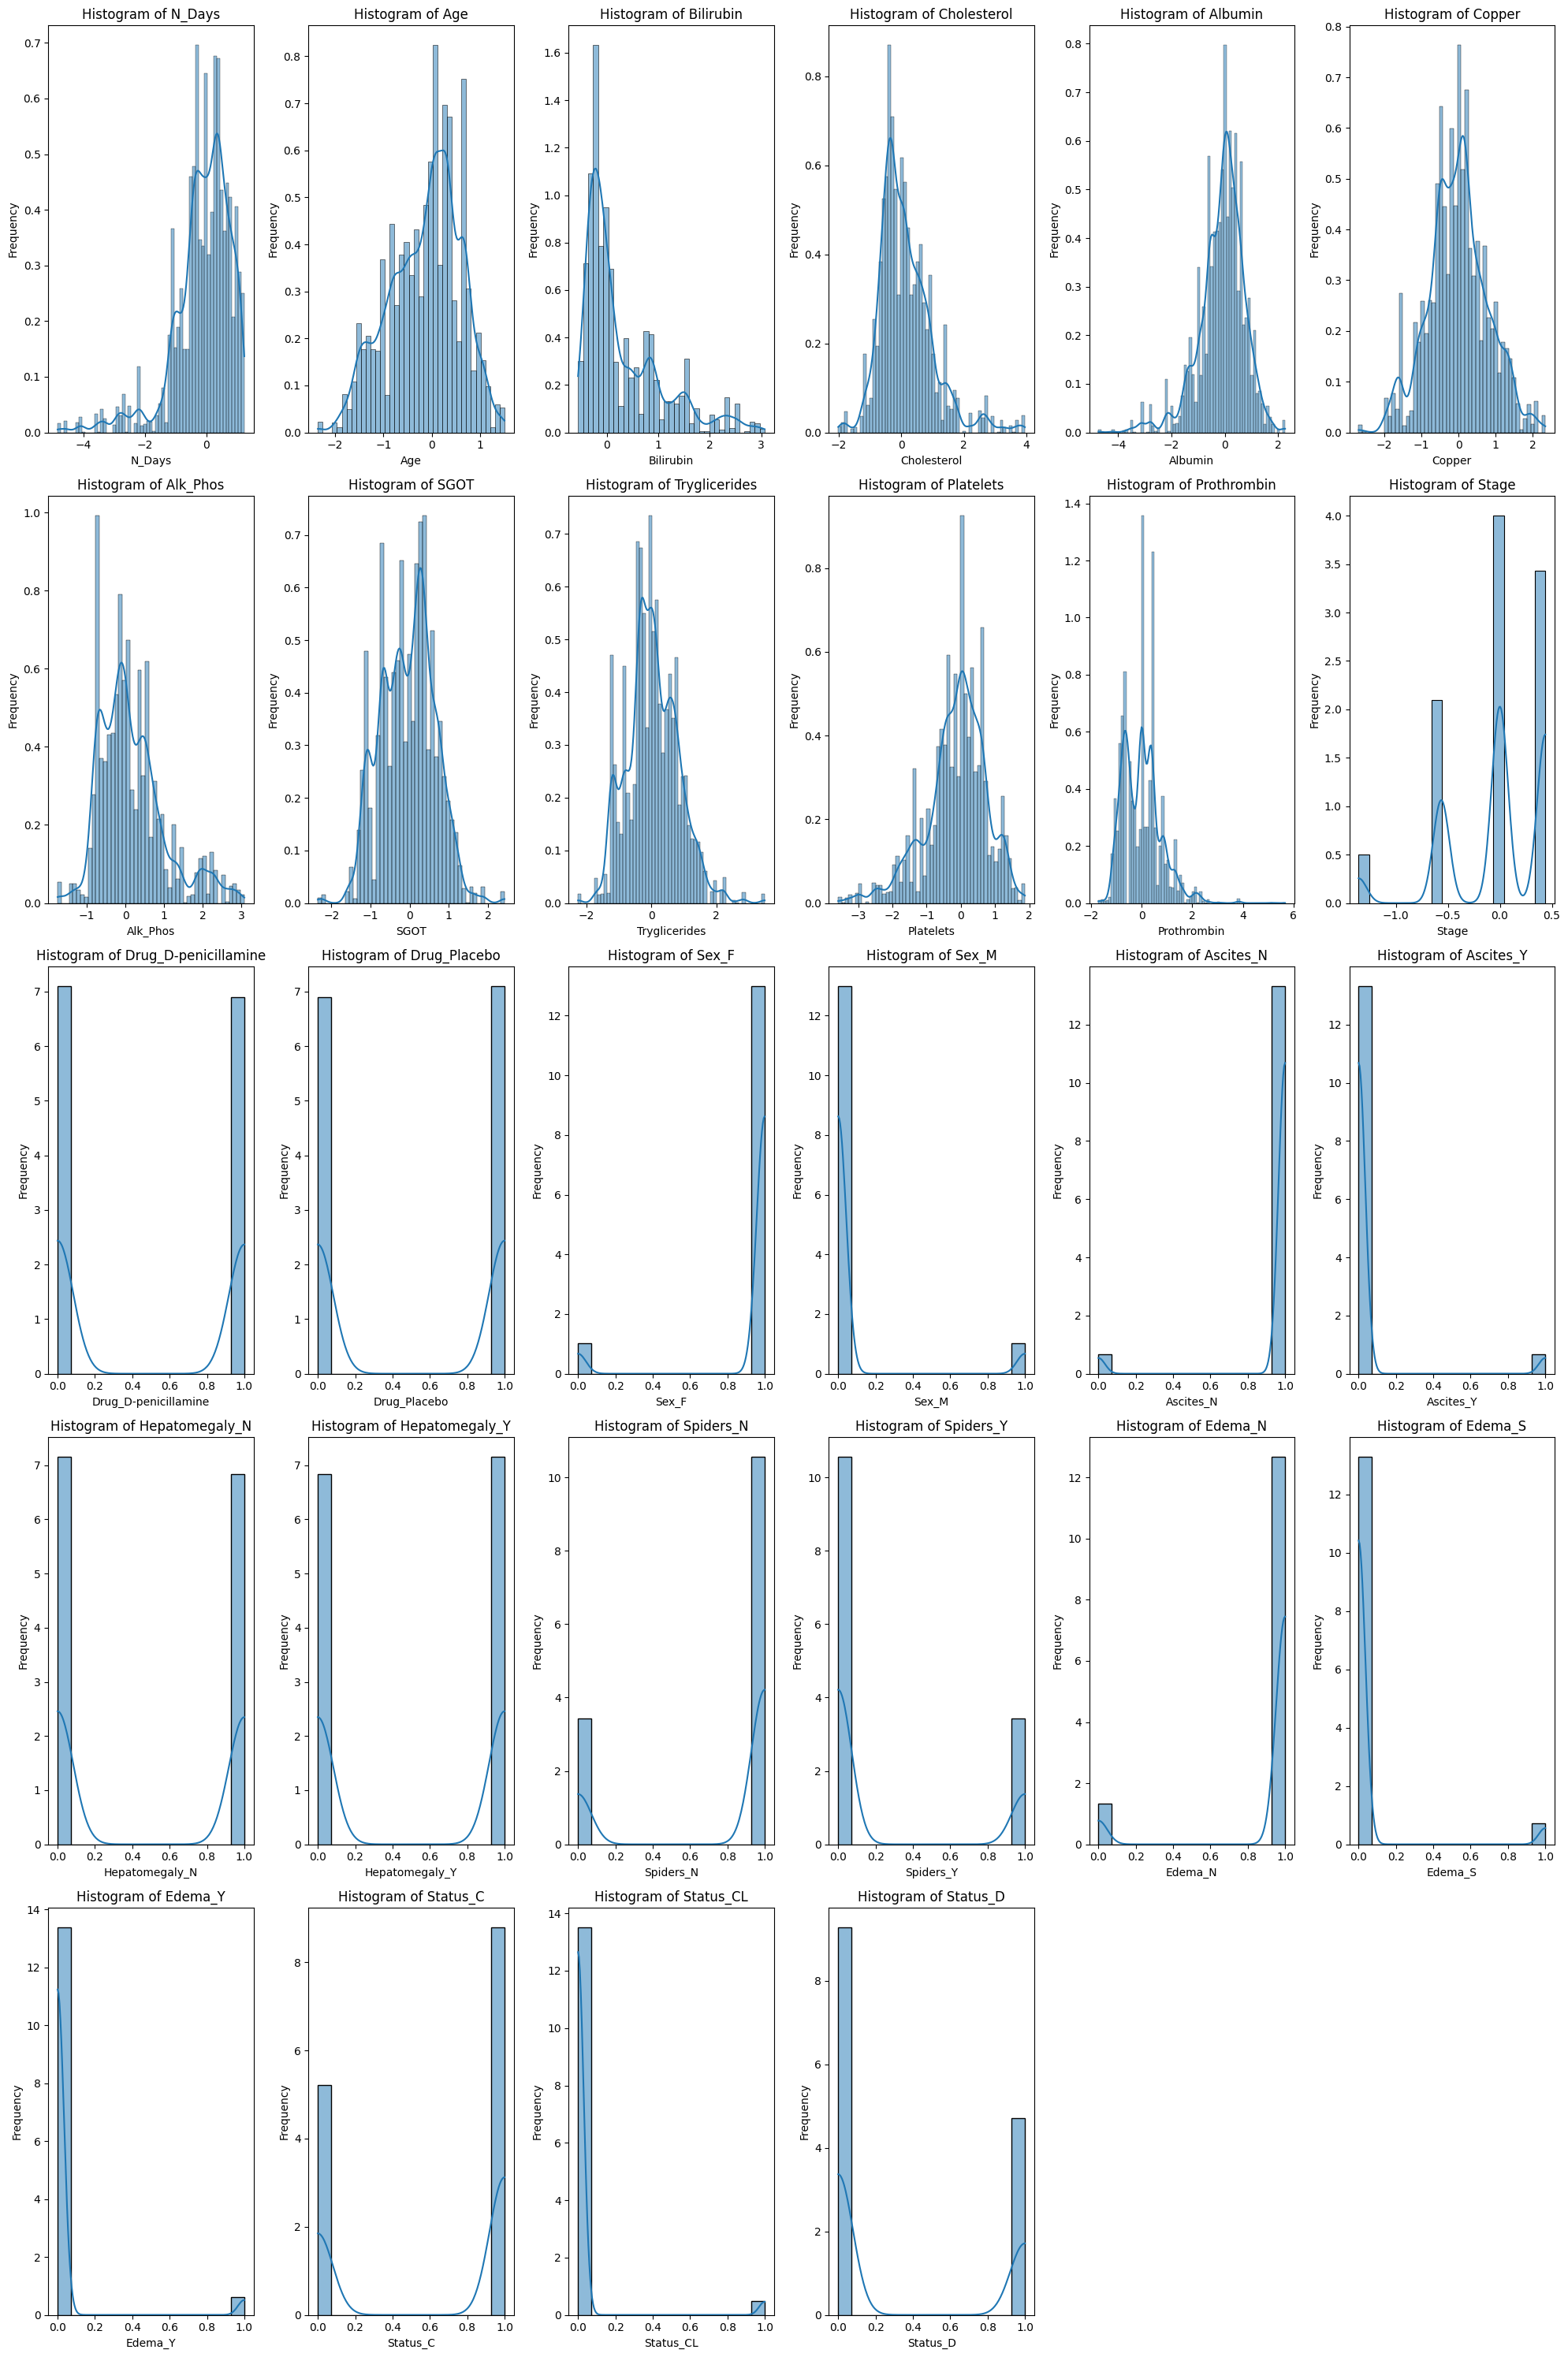

In [112]:
dp.create_histogram(df)

## Creating my model

In [113]:
X = df.drop(columns=['Status_C','Status_CL','Status_D'])
y = df[['Status_C','Status_CL','Status_D']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=210)

In [114]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [115]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 16)                416       
                                                                 
 dense_79 (Dense)            (None, 12)                204       
                                                                 
 dense_80 (Dense)            (None, 8)                 104       
                                                                 
 dense_81 (Dense)            (None, 8)                 72        
                                                                 
 dense_82 (Dense)            (None, 3)                 27        
                                                                 
Total params: 823 (3.21 KB)
Trainable params: 823 (3.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Second model

In [116]:
from keras.layers import Input
from tensorflow.keras.models import Model

In [117]:
in_x = Input(shape = X_train.shape[1:])
x = Dense(32, input_dim=X_train.shape[1], activation = 'relu')(in_x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(8, activation='relu')(x)
out_x = Dense(3, activation='softmax')(x)

model_2 = Model(in_x, out_x)
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 25)]              0         
                                                                 
 dense_83 (Dense)            (None, 32)                832       
                                                                 
 dense_84 (Dense)            (None, 16)                528       
                                                                 
 dense_85 (Dense)            (None, 8)                 136       
                                                                 
 dense_86 (Dense)            (None, 8)                 72        
                                                                 
 dense_87 (Dense)            (None, 3)                 27        
                                                                 
Total params: 1595 (6.23 KB)
Trainable params: 1595 (6.23 K

## Looking at performance

In [118]:
def performance_plots(model, X_Train, y_Train, X_Test, y_Test, history):
    
    scores = model.evaluate(X_Test, y_Test)
    
    plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
    plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
    
    plt.legend()

    plt.show()
    
    plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training Accuracy")
    plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation Accuracy")
    
    plt.legend()

    plt.show()
    
    print(scores)

In [119]:
history=model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=25, batch_size=100)

Epoch 1/25
56/56 [==============================] - 1s 8ms/step - loss: 1.0382 - accuracy: 0.6221 - val_loss: 0.9869 - val_accuracy: 0.6244
Epoch 2/25
56/56 [==============================] - 0s 4ms/step - loss: 0.9507 - accuracy: 0.6297 - val_loss: 0.9184 - val_accuracy: 0.6244
Epoch 3/25
56/56 [==============================] - 0s 4ms/step - loss: 0.8926 - accuracy: 0.6297 - val_loss: 0.8703 - val_accuracy: 0.6244
Epoch 4/25
56/56 [==============================] - 0s 4ms/step - loss: 0.8496 - accuracy: 0.6297 - val_loss: 0.8327 - val_accuracy: 0.6244
Epoch 5/25
56/56 [==============================] - 0s 4ms/step - loss: 0.8148 - accuracy: 0.6297 - val_loss: 0.8005 - val_accuracy: 0.6244
Epoch 6/25
56/56 [==============================] - 0s 4ms/step - loss: 0.7837 - accuracy: 0.6297 - val_loss: 0.7700 - val_accuracy: 0.6244
Epoch 7/25
56/56 [==============================] - 0s 4ms/step - loss: 0.7537 - accuracy: 0.6297 - val_loss: 0.7401 - val_accuracy: 0.6244
Epoch 8/25
56/56 [==

75/75 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.8065


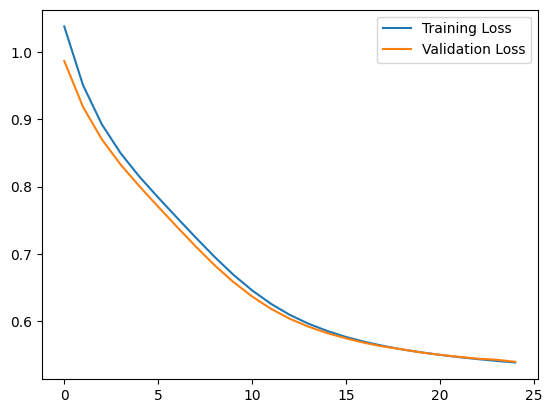

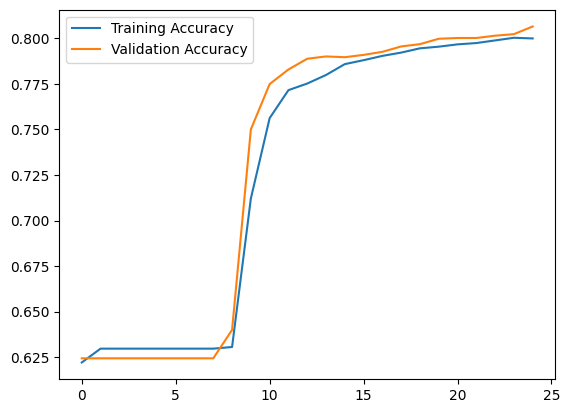

[0.5393535494804382, 0.8064923882484436]


In [120]:
performance_plots(model, X_train, y_train, X_test, y_test, history)

In [121]:
# Not too bad for model 1. Definitely looking better with an SGD optimizer than adam, which I used before.

In [122]:
history=model_2.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=25, batch_size=100)

Epoch 1/25
56/56 [==============================] - 1s 8ms/step - loss: 0.9698 - accuracy: 0.6985 - val_loss: 0.7162 - val_accuracy: 0.7938
Epoch 2/25
56/56 [==============================] - 0s 4ms/step - loss: 0.5593 - accuracy: 0.8028 - val_loss: 0.5294 - val_accuracy: 0.8094
Epoch 3/25
56/56 [==============================] - 0s 4ms/step - loss: 0.5168 - accuracy: 0.8072 - val_loss: 0.5230 - val_accuracy: 0.8086
Epoch 4/25
56/56 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.8079 - val_loss: 0.5166 - val_accuracy: 0.8120
Epoch 5/25
56/56 [==============================] - 0s 4ms/step - loss: 0.5042 - accuracy: 0.8117 - val_loss: 0.5189 - val_accuracy: 0.8065
Epoch 6/25
56/56 [==============================] - 0s 4ms/step - loss: 0.5019 - accuracy: 0.8091 - val_loss: 0.5102 - val_accuracy: 0.8116
Epoch 7/25
56/56 [==============================] - 0s 4ms/step - loss: 0.4986 - accuracy: 0.8082 - val_loss: 0.5093 - val_accuracy: 0.8107
Epoch 8/25
56/56 [==

75/75 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.8082


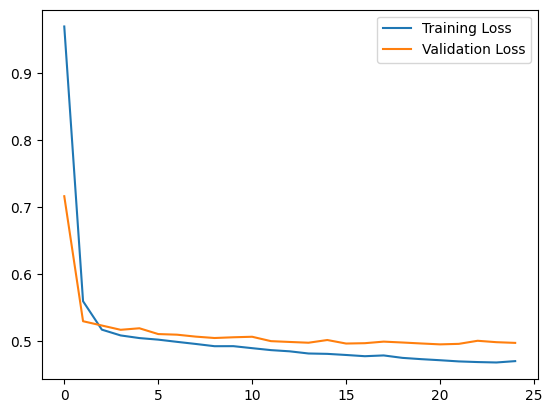

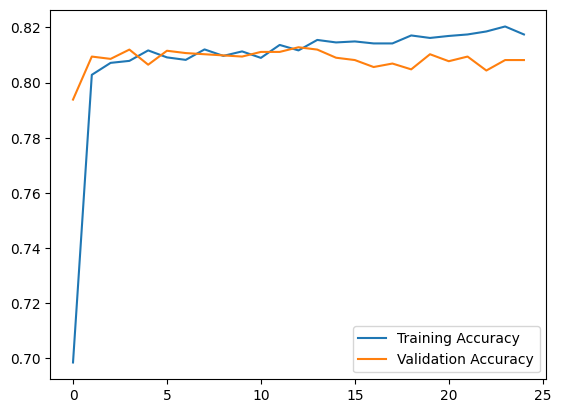

[0.4970458149909973, 0.808178722858429]


In [123]:
performance_plots(model_2, X_train, y_train, X_test, y_test, history)

In [124]:
#A greater overfitting issue. I'll stick to model 1 for now.

## Predictions

75/75 [==============================] - 0s 2ms/step


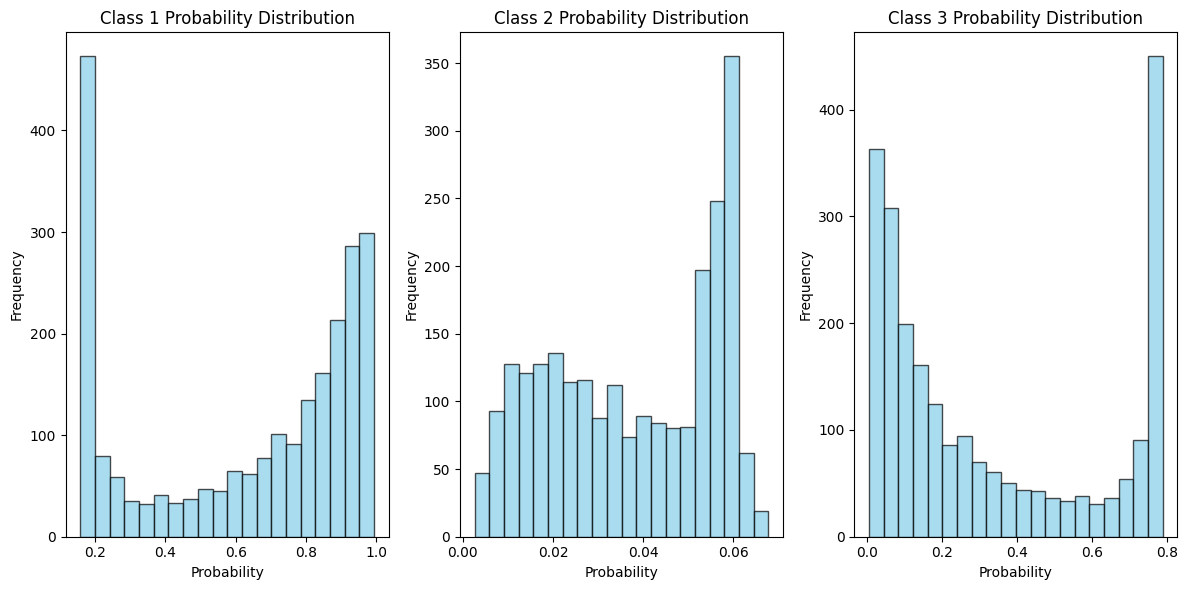

In [125]:
predicted_probabilities = model.predict(X_test)

num_classes = predicted_probabilities.shape[1]
plt.figure(figsize=(12, 6))

for i in range(num_classes):
    plt.subplot(1, num_classes, i + 1)
    plt.hist(predicted_probabilities[:, i], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.title(f'Class {i + 1} Probability Distribution')

plt.tight_layout()
plt.show()

75/75 [==============================] - 0s 2ms/step


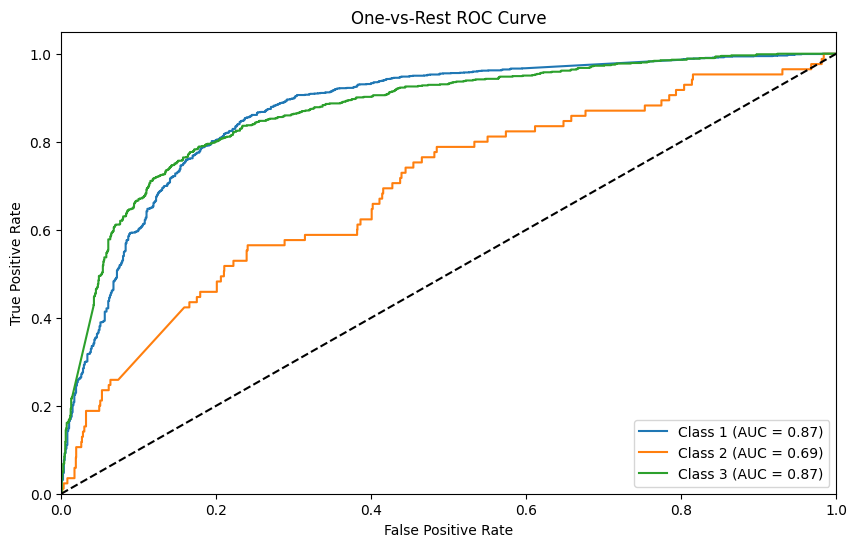

In [126]:
from sklearn.metrics import roc_curve, auc

predicted_probabilities = model.predict(X_test)

y_test_array = y_test.values if isinstance(y_test, (pd.DataFrame, pd.Series)) else y_test

fpr = dict()
tpr = dict()
roc_auc = dict()

num_classes = predicted_probabilities.shape[1]

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_array[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [127]:
# Model 1 is having a hard time predicting class 2 (CL). This also happened in my previous notebook with my ML model.
# This might be due to a class imbalance. CL is a much smaller portion of my dataset.

## Machine Learning Model

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [148]:
df = pd.read_csv('train.csv') 

In [149]:
# I used different preprocessing for my ML model, so I can't reuse the module function...

In [150]:
# I would've done it differently now. I'll just copy and paste what I did.
to_transform = [
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',]

df[to_transform] = np.log(df[to_transform] + 1)
from sklearn.preprocessing import RobustScaler #less sensitive to outliers, which my data has a lot of.
#scaling the features in preparation for random forest.

scaler = RobustScaler()
to_scale = ['N_Days','Bilirubin','Age', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
df[to_scale] = scaler.fit_transform(df[to_scale])

from sklearn.preprocessing import LabelEncoder #This one's new. Forgot this existed at the time....

categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

X = df.drop(columns=['Status', 'id'])
y = df['Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = dict(zip(np.unique(y_train),(len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train)))))
#using class weights to deal with my class imbalance
rf_classifier = RandomForestClassifier(class_weight=class_weights, n_estimators=300, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_val)

#Recall:
#df['Status'].replace('C', 0, inplace=True)
#df['Status'].replace('CL', 1, inplace=True)
#df['Status'].replace('D', 2, inplace=True)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.8304870335230866

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       966
           1       0.64      0.17      0.27        52
           2       0.84      0.71      0.77       563

    accuracy                           0.83      1581
   macro avg       0.77      0.61      0.64      1581
weighted avg       0.83      0.83      0.82      1581



In [151]:
y_proba = rf_classifier.predict_proba(X_val)

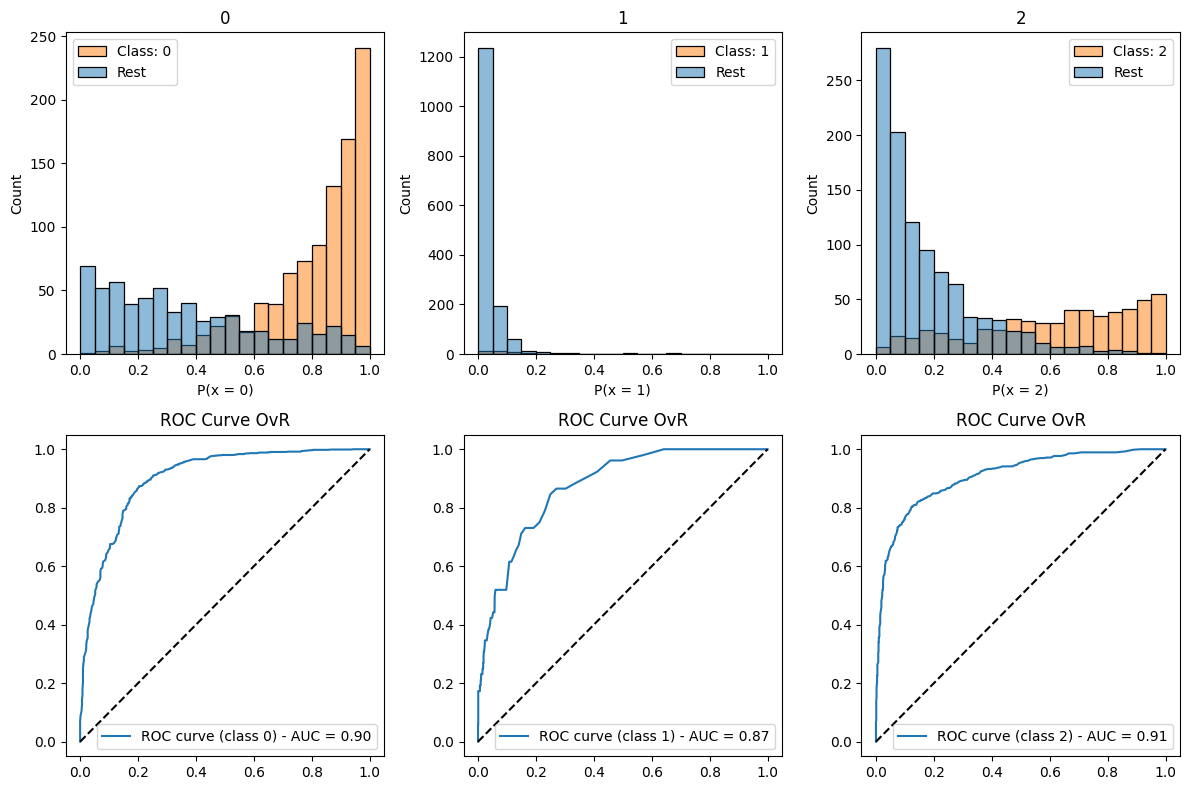

In [153]:
from sklearn.metrics import roc_curve, roc_auc_score
#ROC Curves, One vs Rest
plt.figure(figsize=(12, 8))
bins = [i / 20 for i in range(20)] + [1]
classes = rf_classifier.classes_
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    df_aux = X_val.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_val]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop=True)

    ax = plt.subplot(2, 3, i + 1)
    sns.histplot(x="prob", data=df_aux, hue='class', color='b', ax=ax, bins=bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 3, i + 4)
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    ax_bottom.plot(fpr, tpr, label='ROC curve (class {}) - AUC = {:.2f}'.format(c, roc_auc_score(df_aux['class'], df_aux['prob'])))
    ax_bottom.plot([0, 1], [0, 1], 'k--')
    ax_bottom.set_title("ROC Curve OvR")
    ax_bottom.legend(loc="lower right")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()
plt.show()

In [154]:
# This model seems to be doing significantly better than my NN model.

In [ ]:
# Expected. My dataset is relatively simple. ML is a better approach.